Frames rendered in time: 410
Frames rendered late: 70
Average render time difference: 41.62 ms


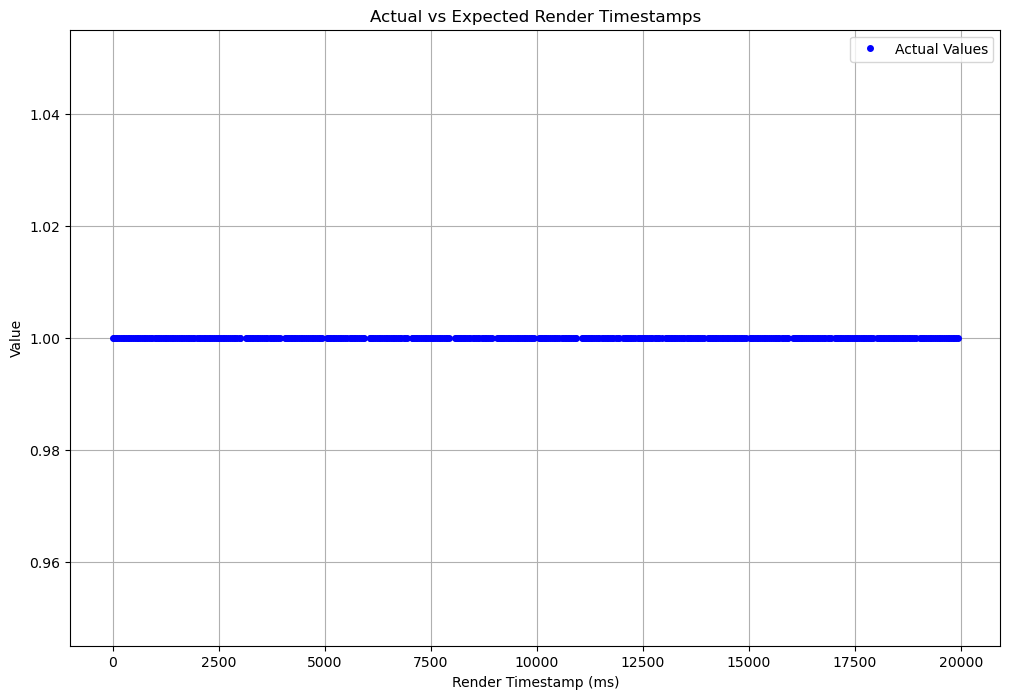

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
import shutil

# Directory containing the .raw files
input_directory = 'raw_frames_gop_24_idle'

# Initialize lists to store timestamps
timestamps = []

# Loop through the directory and extract timestamps from filenames
for filename in sorted(os.listdir(input_directory)):
    if filename.endswith('.raw'):
        # Extract the timestamp from the filename
        timestamp = int(filename.split('.')[0])
        timestamps.append(timestamp)

# Convert timestamps to numpy array
timestamps = np.array(timestamps)

# Subtract the first timestamp from all timestamps
timestamps_adjusted = timestamps - timestamps[0]

# Compute the differences between consecutive timestamps
time_differences = np.diff(timestamps_adjusted)

# Calculate the average time difference
average_time_difference = np.mean(time_differences)

# Create a constant value array (same length as timestamps)
constant_value = 1
values = np.full_like(timestamps_adjusted, constant_value)

# Calculate the expected frame interval for 24 FPS
fps = 24
frame_interval = 1000 / fps

# Generate expected timestamps
expected_timestamps = np.arange(0, timestamps_adjusted[-1] + frame_interval, frame_interval)
expected_values = np.full_like(expected_timestamps, constant_value)

# Count frames rendered in time
frames_rendered_in_time = 0
frames_rendered_late = 0
for index in range(len(timestamps_adjusted)):
    expected_time = expected_timestamps[index]
    actual_time = timestamps_adjusted[index]
    if actual_time <= expected_time:
        # print("In time", actual_time, expected_time)
        frames_rendered_in_time += 1
    else:
        # print("Late", actual_time, expected_time)
        frames_rendered_late += 1
print("Frames rendered in time:", frames_rendered_in_time)
print("Frames rendered late:", frames_rendered_late)


# Plot the actual and expected values
plt.figure(figsize=(12, 8))
plt.plot(timestamps_adjusted, values, 'o', label='Actual Values', color='blue', markersize=4)
# plt.plot(expected_timestamps, expected_values, 'o', label='Expected 24 FPS Values', color='red', markersize=0.1)
plt.xlabel('Render Timestamp (ms)')
plt.ylabel('Value')
plt.title('Actual vs Expected Render Timestamps')
plt.legend()
plt.grid(True)

# Print the average render time difference
print(f"Average render time difference: {average_time_difference:.2f} ms")

plt.savefig(f'plots/actual-render-times-gop-24-idle.pdf', bbox_inches='tight')

In [4]:
# Configuration
output_directory = 'numbered_raw_frames'  # Path to store new .raw files
frame_rate = 24  # Frames per second
timestamp_interval = 1000 / frame_rate  # Interval in milliseconds
number_of_original_frames = 480

# Ensure output directory exists
os.makedirs(output_directory, exist_ok=True)

# List and sort original .raw files by timestamp
files = [f for f in os.listdir(input_directory) if f.endswith('.raw')]
files.sort(key=lambda f: int(f.split('.')[0]))

# Find the earliest timestamp
earliest_timestamp = int(files[0].split('.')[0])

# Normalize timestamps and rename files
normalized_files = []
for file in files:
    old_timestamp = int(file.split('.')[0])
    new_timestamp = old_timestamp - earliest_timestamp
    new_filename = f'{new_timestamp}.raw'
    normalized_files.append(new_filename)
    shutil.copy(os.path.join(input_directory, file), os.path.join(output_directory, new_filename))

print(f"Renamed and copied {len(normalized_files)} files.")

# Create a series of new files based on frame timestamps
current_time = 0
frame_number = 0

while frame_number < number_of_original_frames:
    # Find the latest file before or at the current timestamp
    closest_file = None
    for file in reversed(normalized_files):
        file_timestamp = int(file.split('.')[0])
        print(file_timestamp, current_time)
        if file_timestamp <= current_time:
            closest_file = file
            break
    
    if closest_file is None:
        break  # No more files to process

    # Construct output filename
    output_filename = f'frame-{frame_number}.raw'
    output_file_path = os.path.join(output_directory, output_filename)

    # Copy the closest file to the new series
    shutil.copy(os.path.join(output_directory, closest_file), output_file_path)
    
    # Move to the next timestamp
    current_time += timestamp_interval
    frame_number += 1

# Loop through the list and delete each file
for file_name in normalized_files:
    file_path = os.path.join(output_directory, file_name)
    
    try:
        if os.path.exists(file_path):
            os.remove(file_path)
            # print(f"Deleted: {file_path}")
        else:
            print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error deleting {file_path}: {e}")

print(f"Processed {frame_number} frames.")


Renamed and copied 480 files.
19940 0
19896 0
19855 0
19815 0
19771 0
19732 0
19688 0
19650 0
19618 0
19584 0
19568 0
19538 0
19442 0
19394 0
19358 0
19311 0
19277 0
19232 0
19193 0
19151 0
19118 0
19083 0
19069 0
19036 0
18941 0
18896 0
18854 0
18813 0
18769 0
18733 0
18687 0
18651 0
18619 0
18586 0
18573 0
18541 0
18438 0
18397 0
18355 0
18311 0
18269 0
18230 0
18189 0
18144 0
18117 0
18103 0
18070 0
18039 0
17941 0
17896 0
17856 0
17814 0
17775 0
17729 0
17690 0
17651 0
17603 0
17583 0
17568 0
17535 0
17438 0
17397 0
17355 0
17316 0
17273 0
17237 0
17203 0
17171 0
17137 0
17104 0
17092 0
17053 0
16937 0
16896 0
16857 0
16813 0
16774 0
16730 0
16688 0
16654 0
16623 0
16586 0
16571 0
16547 0
16443 0
16398 0
16360 0
16319 0
16269 0
16231 0
16187 0
16153 0
16123 0
16102 0
16090 0
16062 0
15950 0
15898 0
15855 0
15815 0
15767 0
15727 0
15686 0
15646 0
15617 0
15603 0
15569 0
15536 0
15440 0
15395 0
15360 0
15312 0
15270 0
15230 0
15187 0
15147 0
15103 0
15085 0
15070 0
15040 0
14941 0
14

In [7]:
### Received video frames just stitched together ###

# Configuration
output_directory = 'numbered_raw_frames'  # Path to store new .raw files
frame_rate = 24  # Frames per second
timestamp_interval = 1000 / frame_rate  # Interval in milliseconds
number_of_original_frames = 240

# Ensure output directory exists
os.makedirs(output_directory, exist_ok=True)

# List and sort original .raw files by timestamp
files = [f for f in os.listdir(input_directory) if f.endswith('.raw')]
files.sort(key=lambda f: int(f.split('.')[0]))

# Normalize timestamps and rename files
normalized_files = []
for index, file in enumerate(files):
    old_timestamp = int(file.split('.')[0])
    new_filename = f'frame-{index}.raw'
    normalized_files.append(new_filename)
    shutil.copy(os.path.join(input_directory, file), os.path.join(output_directory, new_filename))

print(f"Renamed and copied {len(normalized_files)} files.")

Renamed and copied 480 files.
